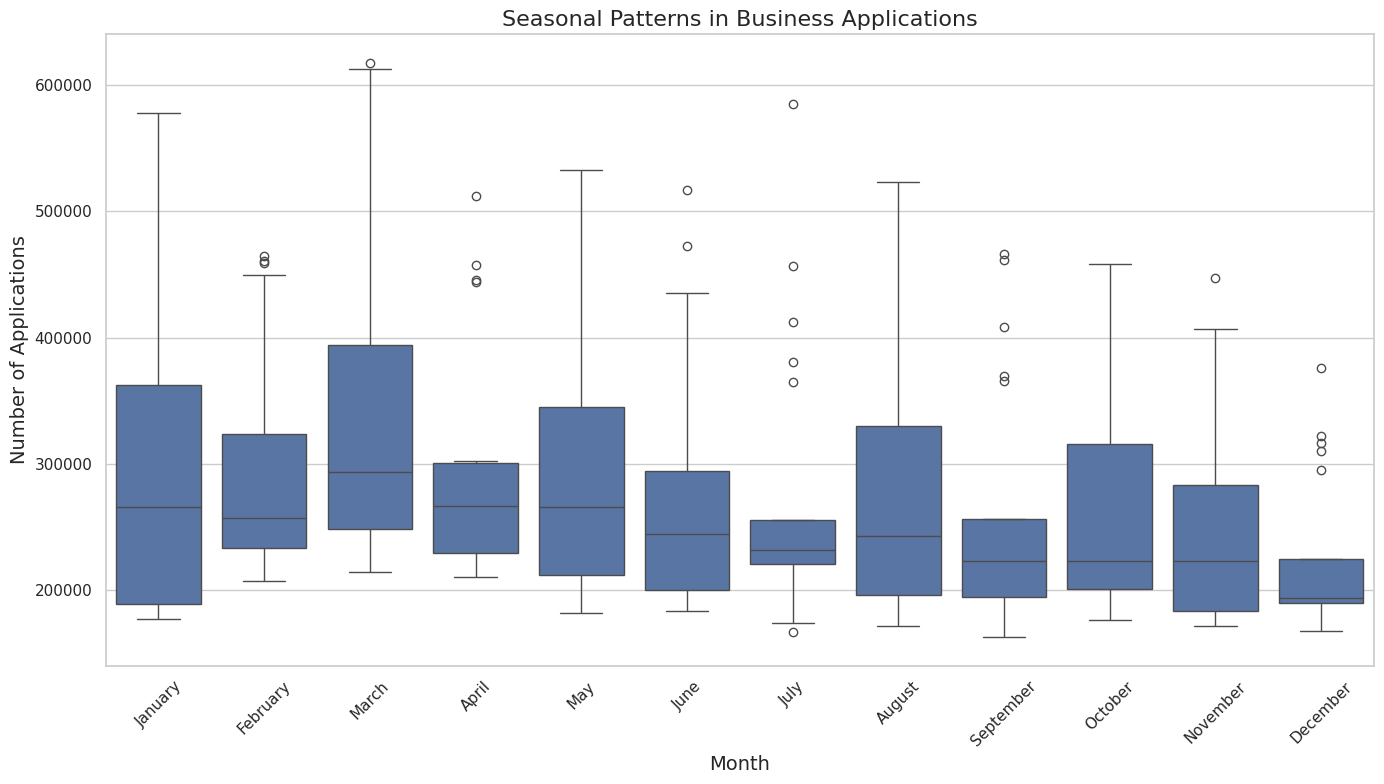

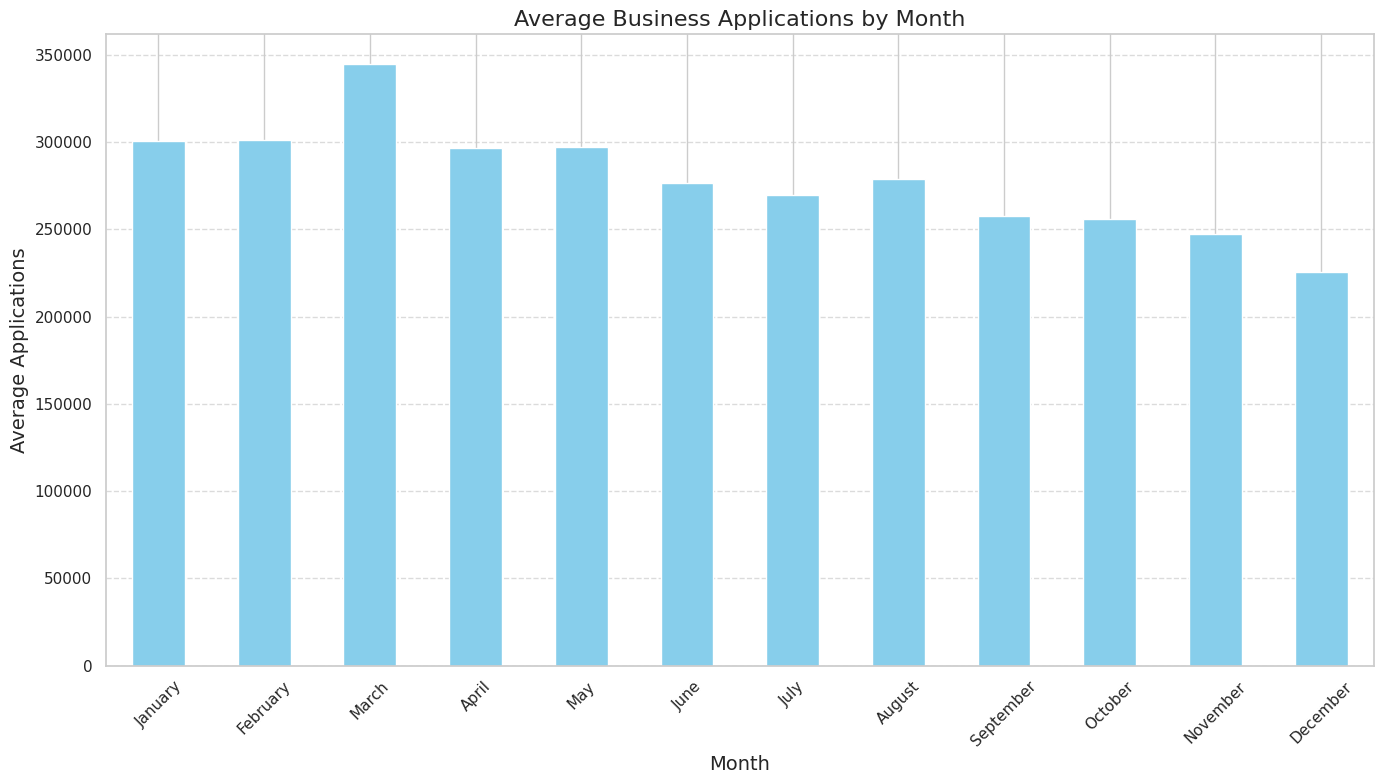


Business Question 1: What seasonal patterns exist in business applications?

Key Findings:
- Highest average applications: March (344487)
- Lowest average applications: December (225347)
- Difference between highest and lowest: 119140


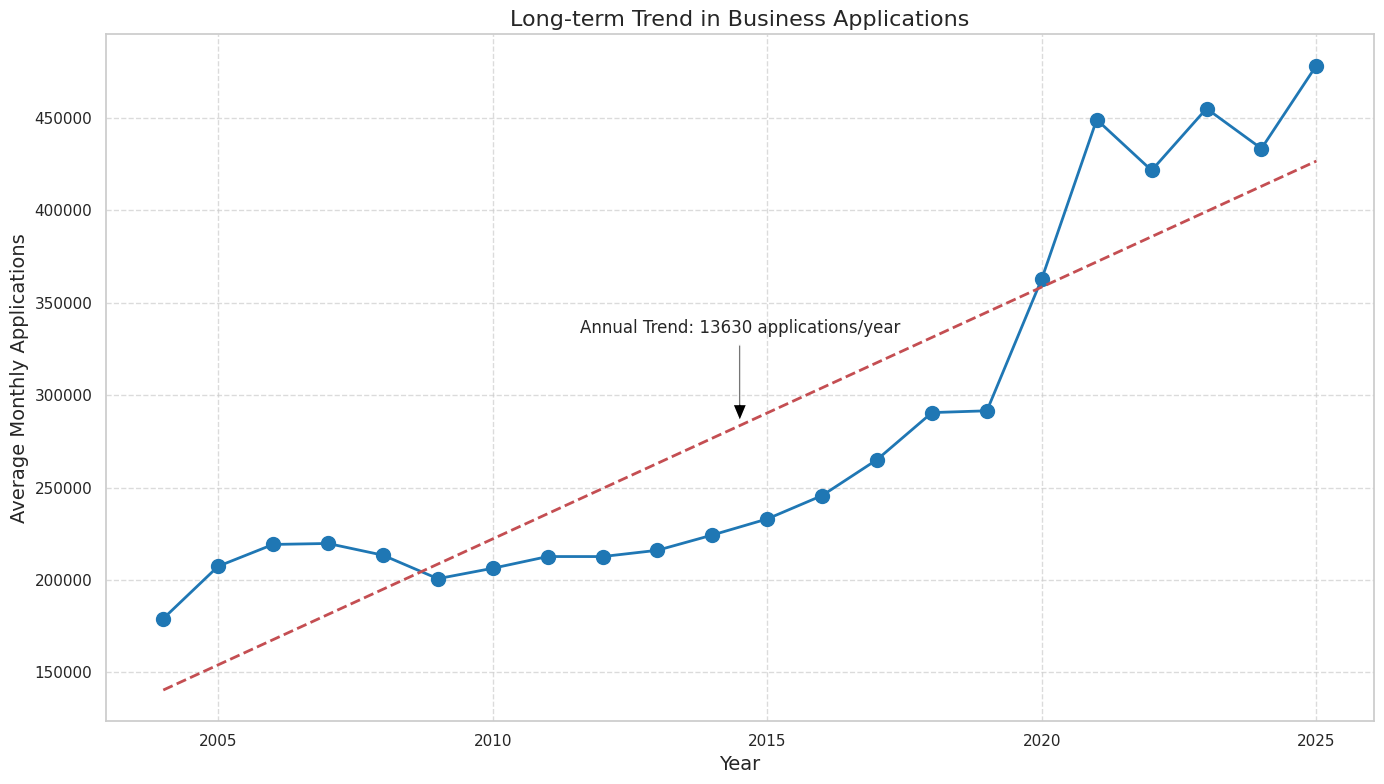


Business Question 2: Is there a long-term trend in business applications?

Key Findings:
- Average annual increase: 13630 applications per year
- From 2004 to 2025: 167.1% overall growth


/tmp/ipykernel_21569/2289961446.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_num'] = data['date'].dt.month


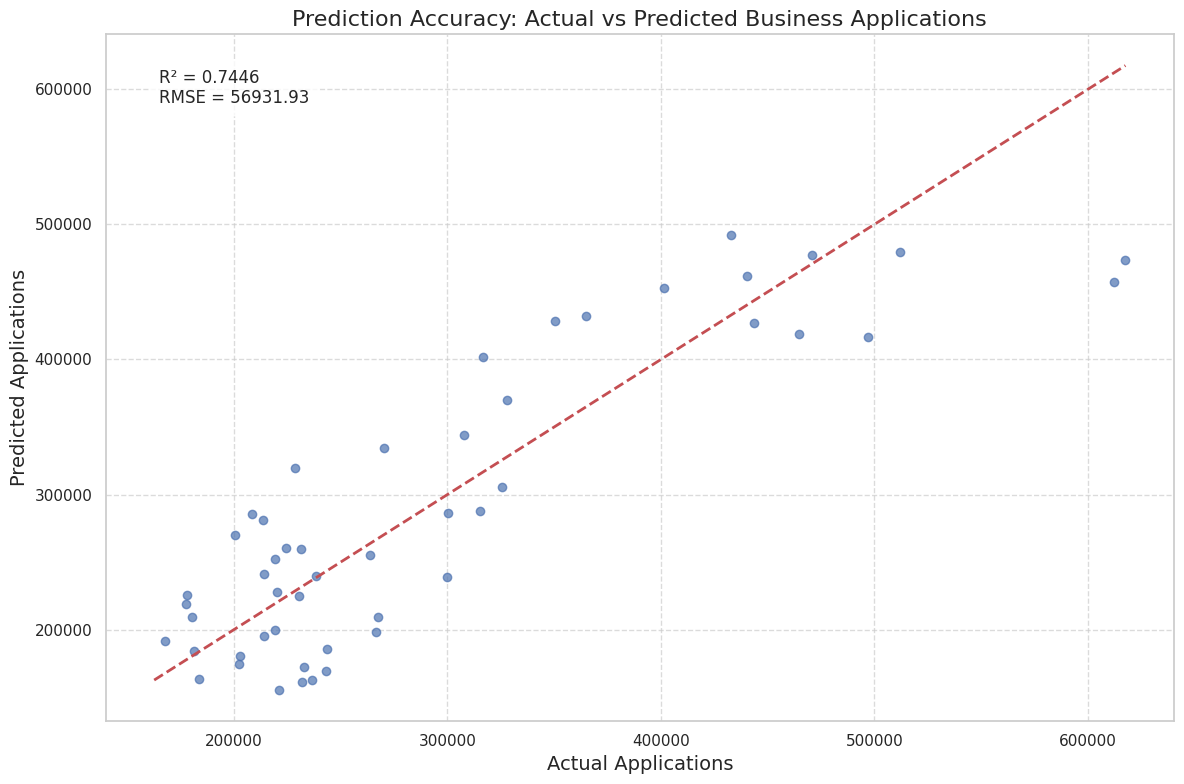


Business Question 3: Can we accurately predict future business applications?

Key Findings:
- Test set R² (accuracy): 0.7446
- Test set RMSE: 56931.93 applications
- The model explains 74.5% of the variation in business applications
- Average error: 20.4% of mean applications


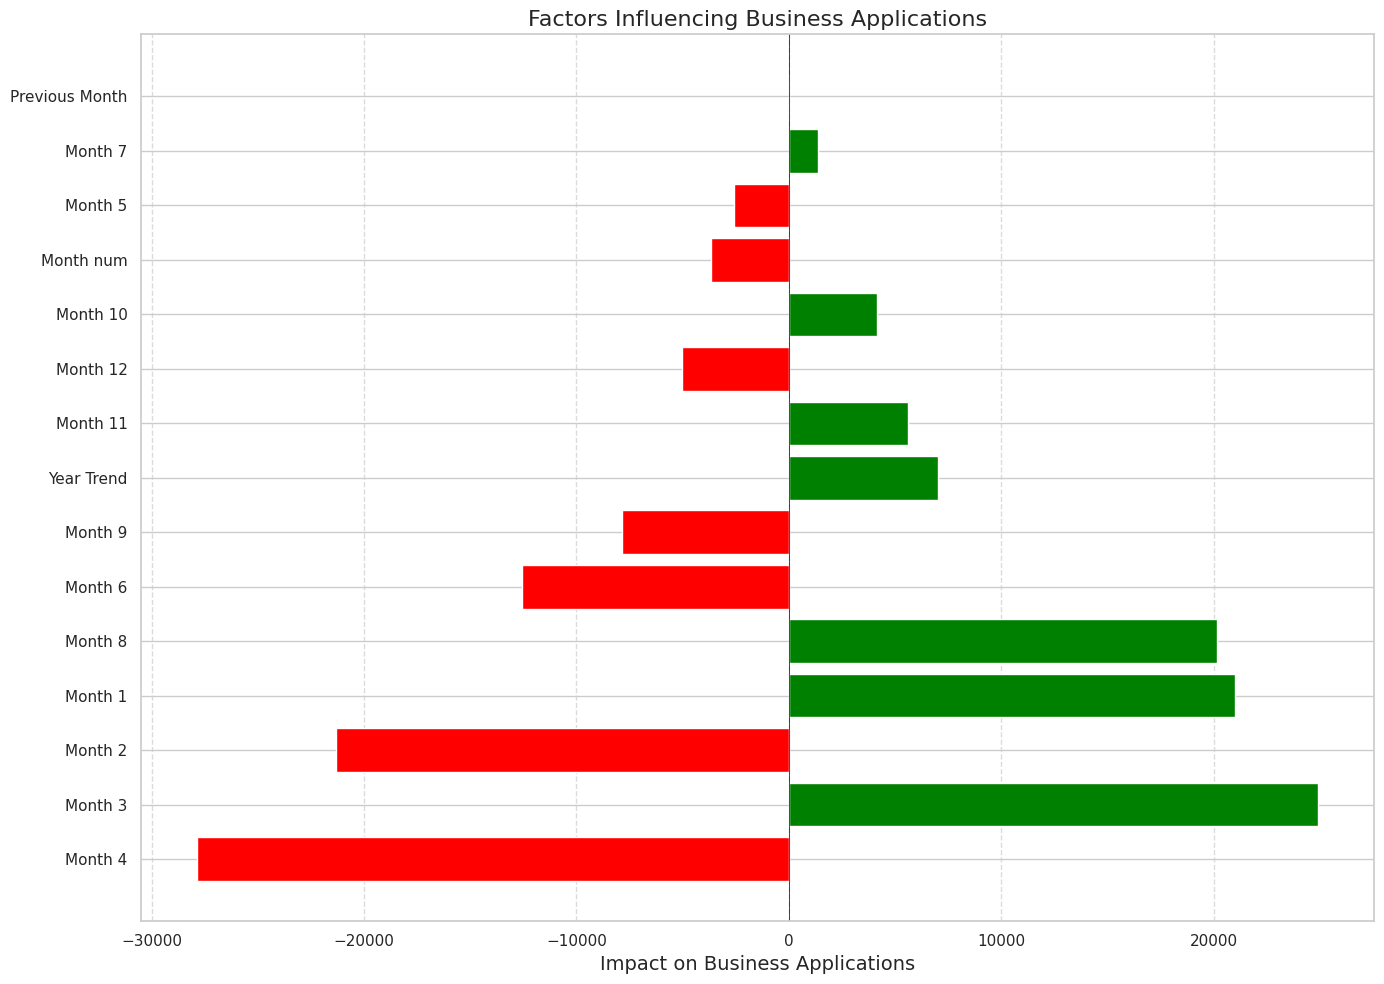


Business Question 4: Which factors most strongly influence business applications?

Key Findings:
Top positive factors:
  1. Month 3: +24904 applications
  2. Month 1: +21019 applications
  3. Month 8: +20130 applications

Top negative factors:
  1. Month 4: -27878 applications
  2. Month 2: -21306 applications
  3. Month 6: -12543 applications

- Previous month's applications: 0.518 applications per application
- Annual trend: 7038 applications per year

Scenario Analysis: January 2025 Business Applications Prediction

Scenario: Previous month had 450,000 applications, what can we expect in January 2025?
Predicted business applications: 483523


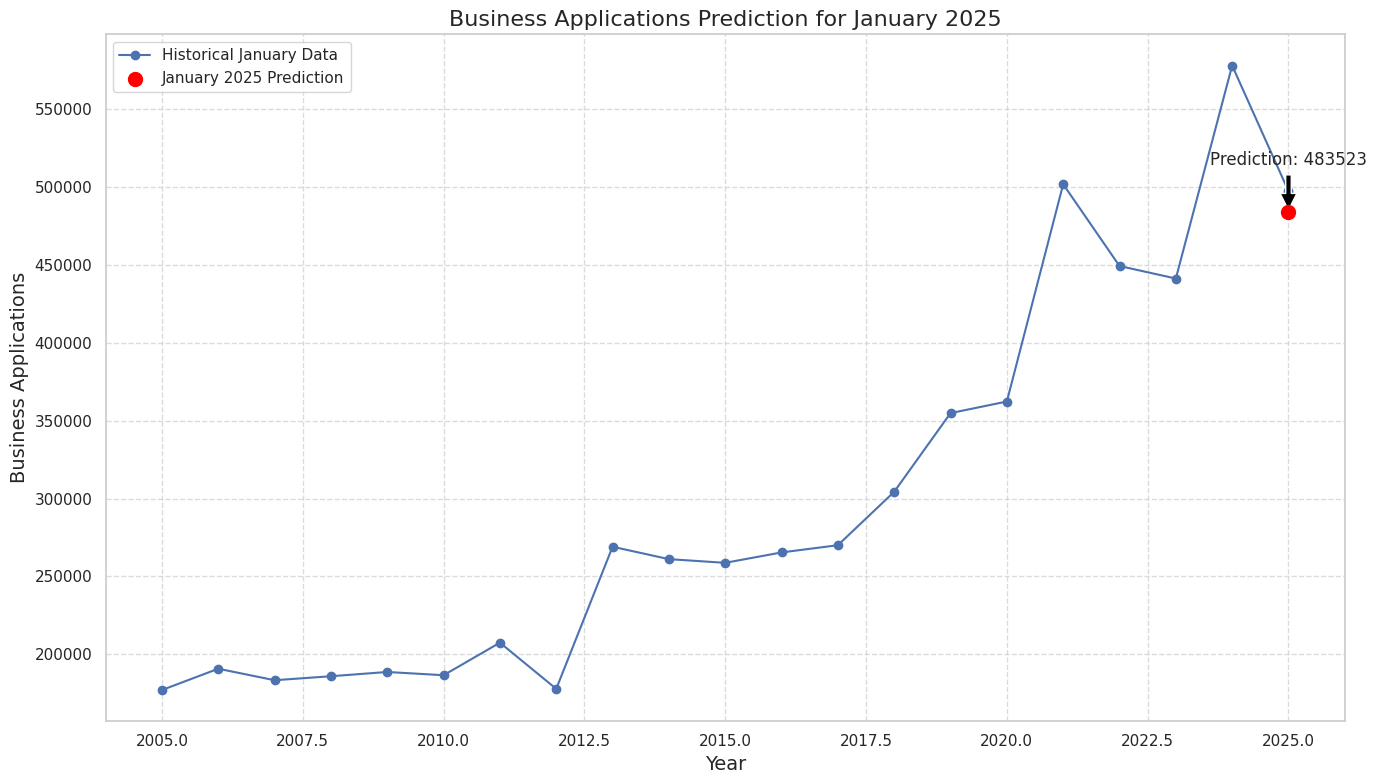


Summary of All Business Questions Analysis Complete!


In [1]:
# -*- coding: utf-8 -*-
"""
Business Applications Analysis - Key Business Questions
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the preprocessed data
# (Make sure to update this path to your actual data file)
data = pd.read_csv('output.csv')

# Filter to US level data and seasonally adjusted series
data = data[data['geo'] == 'US']
data = data[data['sa'].isin(['S', 'U'])]

# Sort data by date to ensure proper order for time series
data['date'] = pd.to_datetime(data['year_month'])
data = data.sort_values('date')

#------------------------------------------------------------
# BUSINESS QUESTION 1: What seasonal patterns exist in business applications?
#------------------------------------------------------------

def analyze_seasonal_patterns(data):
    """
    Analyze and visualize seasonal patterns in business applications.
    
    Parameters:
    data (DataFrame): The dataset containing business applications data
    
    Returns:
    None: Displays and saves visualizations
    """
    # Create a month name column for better visualization
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
    
    # Plot seasonal patterns
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='month', y='applications', data=data, order=month_order)
    plt.title('Seasonal Patterns in Business Applications', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Applications', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('seasonal_patterns.png')
    plt.show()
    
    # Calculate average applications by month
    monthly_avg = data.groupby('month')['applications'].mean().reindex(month_order)
    
    # Plot monthly averages
    plt.figure(figsize=(14, 8))
    monthly_avg.plot(kind='bar', color='skyblue')
    plt.title('Average Business Applications by Month', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Applications', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('monthly_averages.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 1: What seasonal patterns exist in business applications?")
    print("\nKey Findings:")
    print(f"- Highest average applications: {monthly_avg.idxmax()} ({monthly_avg.max():.0f})")
    print(f"- Lowest average applications: {monthly_avg.idxmin()} ({monthly_avg.min():.0f})")
    print(f"- Difference between highest and lowest: {(monthly_avg.max() - monthly_avg.min()):.0f}")

# Call the function
analyze_seasonal_patterns(data)

#------------------------------------------------------------
# BUSINESS QUESTION 2: Is there a long-term trend in business applications?
#------------------------------------------------------------

def analyze_longterm_trend(data):
    """
    Analyze and visualize the long-term trend in business applications.
    
    Parameters:
    data (DataFrame): The dataset containing business applications data
    
    Returns:
    None: Displays and saves visualizations
    """
    # Create yearly averages
    yearly_data = data.groupby('year')['applications'].agg(['mean', 'count']).reset_index()
    
    # Plot the trend
    plt.figure(figsize=(14, 8))
    plt.plot(yearly_data['year'], yearly_data['mean'], marker='o', linestyle='-', 
             linewidth=2, markersize=10, color='#1f77b4')
    
    # Add a trend line
    z = np.polyfit(yearly_data['year'], yearly_data['mean'], 1)
    p = np.poly1d(z)
    plt.plot(yearly_data['year'], p(yearly_data['year']), "r--", linewidth=2)
    
    # Calculate the annual growth rate
    growth_rate = z[0]
    
    plt.title('Long-term Trend in Business Applications', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Monthly Applications', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Annotate the trend line
    plt.annotate(f'Annual Trend: {growth_rate:.0f} applications/year',
                xy=(yearly_data['year'].mean(), p(yearly_data['year'].mean())),
                xytext=(yearly_data['year'].mean(), p(yearly_data['year'].mean()) + 50000),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=10),
                fontsize=12, ha='center')
    
    plt.tight_layout()
    plt.savefig('longterm_trend.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 2: Is there a long-term trend in business applications?")
    print("\nKey Findings:")
    print(f"- Average annual increase: {growth_rate:.0f} applications per year")
    earliest_year = yearly_data['year'].min()
    latest_year = yearly_data['year'].max()
    earliest_avg = yearly_data.loc[yearly_data['year'] == earliest_year, 'mean'].values[0]
    latest_avg = yearly_data.loc[yearly_data['year'] == latest_year, 'mean'].values[0]
    percent_change = ((latest_avg - earliest_avg) / earliest_avg) * 100
    print(f"- From {earliest_year} to {latest_year}: {percent_change:.1f}% overall growth")

# Call the function
analyze_longterm_trend(data)

#------------------------------------------------------------
# BUSINESS QUESTION 3: Can we accurately predict future business applications?
#------------------------------------------------------------

def evaluate_prediction_accuracy(data):
    """
    Evaluate and visualize the accuracy of our prediction model.
    
    Parameters:
    data (DataFrame): The dataset containing business applications data
    
    Returns:
    tuple: The trained model and feature list for use in other functions
    """
    # Create lag feature (previous month's applications)
    data['applications_lag1'] = data['applications'].shift(1)
    
    # Drop rows with missing values
    data = data.dropna(subset=['applications_lag1'])
    
    # Create month indicators (one-hot encoding)
    data['month_num'] = data['date'].dt.month
    month_dummies = pd.get_dummies(data['month_num'], prefix='month')
    data = pd.concat([data, month_dummies], axis=1)
    
    # Define features and target
    data['year_numeric'] = data['date'].dt.year
    
    X = data[['applications_lag1', 'year_numeric'] + 
             [col for col in data.columns if col.startswith('month_')]]
    y = data['applications']
    
    # Split the data (80% train, 20% test)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Plot actual vs predicted values
    plt.figure(figsize=(12, 8))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
    
    # Add metrics to plot
    plt.annotate(f'R² = {test_r2:.4f}\nRMSE = {test_rmse:.2f}',
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, ha='left', va='top',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
    
    plt.xlabel('Actual Applications', fontsize=14)
    plt.ylabel('Predicted Applications', fontsize=14)
    plt.title('Prediction Accuracy: Actual vs Predicted Business Applications', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('prediction_accuracy.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 3: Can we accurately predict future business applications?")
    print("\nKey Findings:")
    print(f"- Test set R² (accuracy): {test_r2:.4f}")
    print(f"- Test set RMSE: {test_rmse:.2f} applications")
    print(f"- The model explains {test_r2*100:.1f}% of the variation in business applications")
    avg_applications = data['applications'].mean()
    print(f"- Average error: {(test_rmse/avg_applications)*100:.1f}% of mean applications")
    
    return model, X.columns.tolist()

# Call the function
model, feature_names = evaluate_prediction_accuracy(data)

#------------------------------------------------------------
# BUSINESS QUESTION 4: Which factors have the strongest influence on business applications?
#------------------------------------------------------------

def analyze_feature_importance(model, feature_names):
    """
    Analyze and visualize which factors most strongly influence business applications.
    
    Parameters:
    model: The trained LinearRegression model
    feature_names: List of feature names used in the model
    
    Returns:
    None: Displays and saves visualizations
    """
    # Create feature importance dataframe
    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    })
    
    # Clean up feature names for display
    coefficients['Feature'] = coefficients['Feature'].apply(lambda x: 
        x.replace('month_', 'Month ') if x.startswith('month_') else
        'Previous Month' if x == 'applications_lag1' else
        'Year Trend' if x == 'year_numeric' else x
    )
    
    # Sort by absolute value for visualization
    coefficients = coefficients.reindex(
        coefficients['Coefficient'].abs().sort_values(ascending=False).index
    )
    
    # Plot horizontal bar chart
    plt.figure(figsize=(14, 10))
    
    # Create color map based on coefficient sign
    colors = ['green' if c > 0 else 'red' for c in coefficients['Coefficient']]
    
    plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.xlabel('Impact on Business Applications', fontsize=14)
    plt.title('Factors Influencing Business Applications', fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 4: Which factors most strongly influence business applications?")
    print("\nKey Findings:")
    
    # Get top positive and negative factors
    pos_factors = coefficients[coefficients['Coefficient'] > 0].head(3)
    neg_factors = coefficients[coefficients['Coefficient'] < 0].head(3)
    
    print("Top positive factors:")
    for i, (_, row) in enumerate(pos_factors.iterrows(), 1):
        print(f"  {i}. {row['Feature']}: +{row['Coefficient']:.0f} applications")
        
    print("\nTop negative factors:")
    for i, (_, row) in enumerate(neg_factors.iterrows(), 1):
        print(f"  {i}. {row['Feature']}: {row['Coefficient']:.0f} applications")
        
    # Check lag and year trend impact
    lag_impact = coefficients.loc[coefficients['Feature'] == 'Previous Month', 'Coefficient'].values[0]
    year_impact = coefficients.loc[coefficients['Feature'] == 'Year Trend', 'Coefficient'].values[0]
    
    print(f"\n- Previous month's applications: {lag_impact:.3f} applications per application")
    print(f"- Annual trend: {year_impact:.0f} applications per year")

# Call the function
analyze_feature_importance(model, feature_names)

#------------------------------------------------------------
# Prediction Scenario
#------------------------------------------------------------

def predict_business_scenario():
    """
    Create and visualize a prediction scenario for January 2025.
    
    Parameters:
    None (uses already trained model)
    
    Returns:
    None: Displays and saves visualization
    """
    print("\nScenario Analysis: January 2025 Business Applications Prediction")
    print("\nScenario: Previous month had 450,000 applications, what can we expect in January 2025?")
    
    # Create a sample data point
    new_data = pd.DataFrame({
        'applications_lag1': [450000],
        'year_numeric': [2025],
        'month_num': [1]  # January
    })
    
    # Add month dummy variables
    for month in range(1, 13):
        new_data[f'month_{month}'] = 1 if month == 1 else 0
    
    # Make prediction
    prediction = model.predict(new_data)[0]
    
    print(f"Predicted business applications: {prediction:.0f}")
    
    # Create a visualization showing context
    # Get historical January data
    historical_jan = data[data['month'] == 'January'].sort_values('year')
    
    plt.figure(figsize=(14, 8))
    
    # Plot historical January data
    plt.plot(historical_jan['year'], historical_jan['applications'], 
             marker='o', linestyle='-', label='Historical January Data')
    
    # Add our prediction
    plt.scatter(2025, prediction, color='red', s=100, zorder=5, 
                label='January 2025 Prediction')
    
    # Add annotation
    plt.annotate(f'Prediction: {prediction:.0f}',
                xy=(2025, prediction),
                xytext=(2025, prediction + 30000),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')
    
    plt.title('Business Applications Prediction for January 2025', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Business Applications', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig('january_2025_prediction.png')
    plt.show()
    
    return prediction

# Call the function
prediction_result = predict_business_scenario()

print("\nSummary of All Business Questions Analysis Complete!")